Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
boston = load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=["price"])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


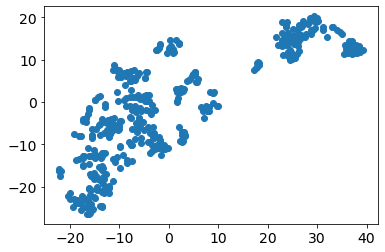

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100, max_iter=100)

labels_train = model.fit_predict(X_train_scaled)

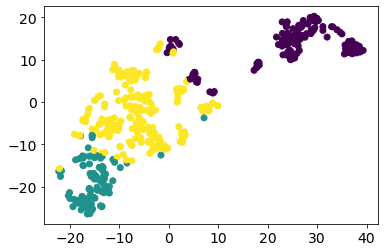

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [38]:
X_train_scaled.CRIM[labels_train == 0].mean(), \
X_train_scaled.CRIM[labels_train == 1].mean(), \
X_train_scaled.CRIM[labels_train == 2].mean(),

(0.810903555051046, -0.39886418651917493, -0.3595938819415387)

In [45]:
y_train.price[labels_train == 0].mean(), \
y_train.price[labels_train == 1].mean(), \
y_train.price[labels_train == 2].mean(),

(16.165354330708663, 27.78837209302326, 24.958115183246072)

Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [46]:
labels_test = model.predict(X_test_scaled)

In [49]:
X_test_scaled.CRIM[labels_test == 0].mean(), \
X_test_scaled.CRIM[labels_test == 1].mean(), \
X_test_scaled.CRIM[labels_test == 2].mean(),

(0.7396611726050217, -0.4001621889856215, -0.3771458000659119)

In [50]:
y_test.price[labels_test == 0].mean(), \
y_test.price[labels_test == 1].mean(), \
y_test.price[labels_test == 2].mean(),

(16.43714285714286, 31.35, 21.860784313725492)